In [1]:
import pyro
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyro.infer import EmpiricalMarginal
from pyro.infer import Importance
pyro.set_rng_seed(101)

In [2]:
def setProb():
    a = [0.5, 0.5]
    b = [[0.8,0.1],
         [0.2,0.9]]
    c = [[[[0.9, 0.99],
        [0.1, 0.01]]],
        [[0.1, 0.4],
        [0.9, 0.6]]]
    prob_dict = { 'a': a, 'b': b, 'c':c}
    return prob_dict

In [3]:
def model(prob_dict):
    a = pyro.sample("a", 
            pyro.distributions.Categorical(torch.tensor(prob_dict['a'])))
    b = pyro.sample("b",
            pyro.distributions.Categorical(torch.tensor(prob_dict['b'][a])))
    
    
    c = pyro.sample("c", 
            pyro.distributions.Categorical(torch.tensor(prob_dict['c'][b][a])))
    
    return c

3.6.1 Source code for the model -> P(A= on | b = 'on' and c = 'on')

In [4]:
def drawHist():
    prob_dict = setProb()
    a_list = []
    cModel = pyro.condition(model, 
                data={'b': torch.tensor(1), 'c':torch.tensor(1)})
    importance = Importance(cModel, num_samples=20000).run(prob_dict)
    m = EmpiricalMarginal(importance, "a")
    for _ in range(20000):
        a = m().item()
        a_list.append('on' if a == 1 else 'off')
    p = (np.unique(a_list, return_counts=True)[1][1]/len(a_list))
    plt.hist(a_list)
    plt.ylabel('Frequency')
    plt.xlabel('A')
    plt.title(' P(A = on | b = on and c = on) =' + str(p))
    plt.show()

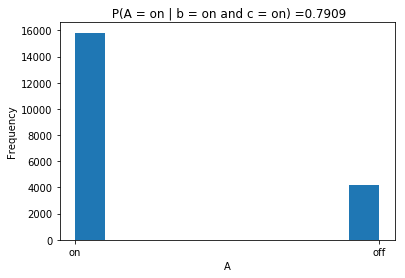

In [5]:
drawHist()

3.6.2 Source code for the model -> P(A= on | do(b = 'on') and c = 'on')

In [6]:
def drawHist():
    prob_dict = setProb()
    a_list = []
    cModel = pyro.condition(model, 
                data={'c':torch.tensor(1)})
    dModel = pyro.do(cModel, data={'b' : torch.tensor(1)})
    importance = Importance(dModel, num_samples=20000).run(prob_dict)
    m = EmpiricalMarginal(importance, "a")
    for _ in range(20000):
        a = m().item()
        a_list.append('on' if a == 1 else 'off')
    p = (np.unique(a_list, return_counts=True)[1][1]/len(a_list))
    plt.hist(a_list)
    plt.ylabel('Frequency')
    plt.xlabel('A')
    plt.title(' P(A = on | do(b = on) and c = on) =' + str(p))
    plt.show()

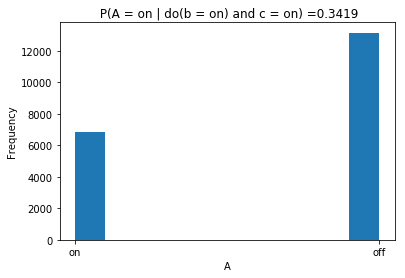

In [7]:
drawHist()